## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _femele_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)

In [1]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Mapping semua variabel independen terhadap variabel dependen

c:\Users\PAVILION\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


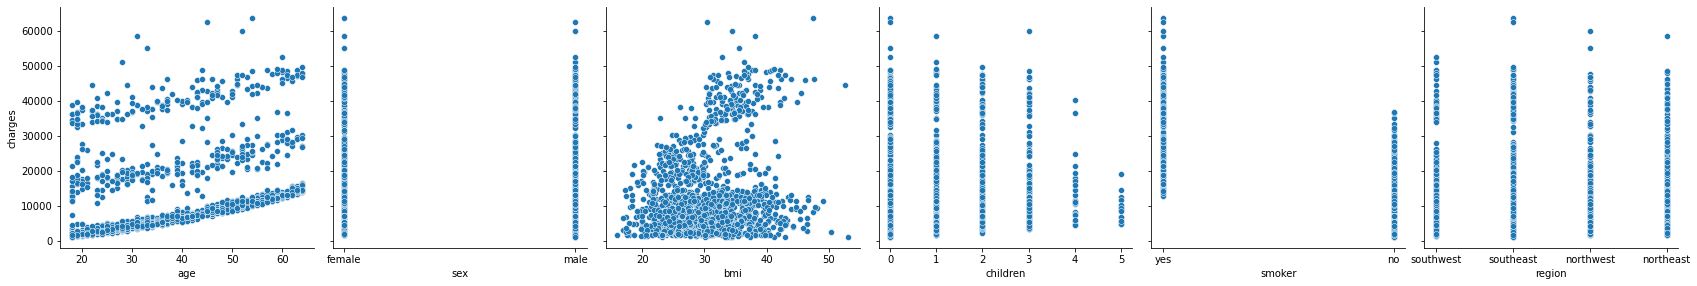

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.pairplot(df, x_vars=['age','sex','bmi', 'children', 'smoker', 'region'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

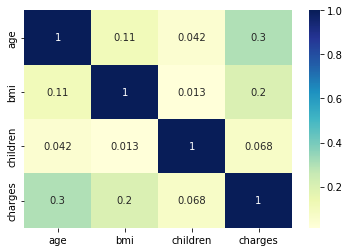

In [3]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [4]:
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df['region'] = df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
5,31,1,25.740,0,0,1,3756.62160
6,46,1,33.440,1,0,1,8240.58960
7,37,1,27.740,3,0,2,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,2,28923.13692


### Mengecek kondisi multicollinearity untuk semua variabel independen

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
A = df[['age','sex','bmi','children','smoker','region']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = A.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)

    feature       VIF
0       age  7.832033
1       sex  1.918058
2       bmi  8.974743
3  children  1.799475
4    smoker  1.252796
5    region  2.534044


Semua variabel independen memiliki multicolinearity. Variabel independen yang memiliki multicoleniarity rendah, antara lain variabel smoker, children, sex, dan region. Variabel age dan bmi memiliki multicoleniarity yang tinggi.
pada langkah selanjutnya mengevaluasi model dengan nilai R2 menggunakan variabel independen yang multicoleniarity nya rendah.

Evaluasi Model dengan nilai R2 menggunakan variabel independen smoker

In [6]:
x1 = df.iloc[:,4].values
x1 = x1.reshape(len(x1),1)
y1 = df.iloc[:,-1].values 
y1 = y1.reshape(len(y1),1) 

In [7]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.1, random_state=50)

lr1 = LinearRegression()
# Fit Feature 
lr1.fit(x1_train, y1_train)

# Predict
y1_pred = lr1.predict(x1_test)

# Compare Actual Value vs Prediction Value
comp = np.concatenate((y1_test, y1_pred), axis=1)
comp 

array([[ 5976.8311    ,  8447.40324583],
       [ 5846.9176    ,  8447.40324583],
       [13831.1152    ,  8447.40324583],
       [ 9625.92      ,  8447.40324583],
       [ 2680.9493    ,  8447.40324583],
       [47896.79135   , 31831.45633731],
       [18223.4512    , 31831.45633731],
       [ 7419.4779    ,  8447.40324583],
       [ 3732.6251    ,  8447.40324583],
       [12222.8983    ,  8447.40324583],
       [ 7050.0213    ,  8447.40324583],
       [21978.6769    , 31831.45633731],
       [ 6282.235     ,  8447.40324583],
       [37701.8768    , 31831.45633731],
       [ 7046.7222    ,  8447.40324583],
       [12032.326     ,  8447.40324583],
       [13112.6048    ,  8447.40324583],
       [ 4239.89265   ,  8447.40324583],
       [12333.828     ,  8447.40324583],
       [ 3410.324     ,  8447.40324583],
       [ 1727.785     ,  8447.40324583],
       [44641.1974    , 31831.45633731],
       [17128.42608   ,  8447.40324583],
       [ 6112.35295   ,  8447.40324583],
       [ 4529.47

In [8]:
from sklearn.metrics import r2_score

r2_val = r2_score(y1_test, y1_pred)
print(f'Hasil Evaluasi R2 = {r2_val}')

Hasil Evaluasi R2 = 0.6385650545269081


Evaluasi Model dengan nilai R2 menggunakan variabel independen children

In [9]:
x2 = df.iloc[:,3].values
x2 = x2.reshape(len(x2),1)
y2 = df.iloc[:,-1].values
y2 = y2.reshape(len(y2),1) 

In [10]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.1, random_state=50)

lr2 = LinearRegression()
# Fit Feature 
lr2.fit(x2_train, y2_train)

# Predict
y2_pred = lr2.predict(x2_test)

# Compare Actual Value vs Prediction Value
comp2 = np.concatenate((y2_test, y2_pred), axis=1)
comp2 

array([[ 5976.8311    , 13226.3539358 ],
       [ 5846.9176    , 13942.73507179],
       [13831.1152    , 12509.97279981],
       [ 9625.92      , 12509.97279981],
       [ 2680.9493    , 12509.97279981],
       [47896.79135   , 13226.3539358 ],
       [18223.4512    , 14659.11620778],
       [ 7419.4779    , 12509.97279981],
       [ 3732.6251    , 12509.97279981],
       [12222.8983    , 12509.97279981],
       [ 7050.0213    , 12509.97279981],
       [21978.6769    , 13226.3539358 ],
       [ 6282.235     , 13226.3539358 ],
       [37701.8768    , 13226.3539358 ],
       [ 7046.7222    , 13226.3539358 ],
       [12032.326     , 13226.3539358 ],
       [13112.6048    , 13226.3539358 ],
       [ 4239.89265   , 13226.3539358 ],
       [12333.828     , 13226.3539358 ],
       [ 3410.324     , 13226.3539358 ],
       [ 1727.785     , 12509.97279981],
       [44641.1974    , 13942.73507179],
       [17128.42608   , 15375.49734377],
       [ 6112.35295   , 13226.3539358 ],
       [ 4529.47

In [11]:
r2_val2 = r2_score(y2_test, y2_pred)
print(f'Hasil Evaluasi R2 = {r2_val2}')

Hasil Evaluasi R2 = 0.001080467302037591


Evaluasi Model dengan nilai R2 menggunakan variabel independen sex

In [12]:
x3 = df.iloc[:,1].values
x3 = x3.reshape(len(x3),1)
y3 = df.iloc[:,-1].values
y3 = y3.reshape(len(y3),1) 

In [13]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.1, random_state=50)

lr3 = LinearRegression()
# Fit Feature 
lr3.fit(x3_train, y3_train)

# Predict
y3_pred = lr3.predict(x3_test)

# Compare Actual Value vs Prediction Value
comp3 = np.concatenate((y3_test, y3_pred), axis=1)
comp3 

array([[ 5976.8311    , 12480.89766775],
       [ 5846.9176    , 12480.89766775],
       [13831.1152    , 14049.56964143],
       [ 9625.92      , 12480.89766775],
       [ 2680.9493    , 14049.56964143],
       [47896.79135   , 12480.89766775],
       [18223.4512    , 12480.89766775],
       [ 7419.4779    , 12480.89766775],
       [ 3732.6251    , 12480.89766775],
       [12222.8983    , 12480.89766775],
       [ 7050.0213    , 12480.89766775],
       [21978.6769    , 14049.56964143],
       [ 6282.235     , 14049.56964143],
       [37701.8768    , 12480.89766775],
       [ 7046.7222    , 12480.89766775],
       [12032.326     , 12480.89766775],
       [13112.6048    , 14049.56964143],
       [ 4239.89265   , 14049.56964143],
       [12333.828     , 14049.56964143],
       [ 3410.324     , 12480.89766775],
       [ 1727.785     , 12480.89766775],
       [44641.1974    , 12480.89766775],
       [17128.42608   , 14049.56964143],
       [ 6112.35295   , 12480.89766775],
       [ 4529.47

In [14]:
r2_val3 = r2_score(y3_test, y3_pred)
print(f'Hasil Evaluasi R2 = {r2_val3}')

Hasil Evaluasi R2 = -0.005189615813967041


Evaluasi Model dengan nilai R2 menggunakan variabel independen region

In [18]:
x4 = df.iloc[:,5].values
x4 = x4.reshape(len(x4),1)
y4 = df.iloc[:,-1].values
y4 = y4.reshape(len(y4),1) 

In [19]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.1, random_state=50)

lr4 = LinearRegression()
# Fit Feature 
lr4.fit(x4_train, y4_train)

# Predict
y4_pred = lr4.predict(x4_test)

# Compare Actual Value vs Prediction Value
comp4 = np.concatenate((y4_test, y4_pred), axis=1)
comp4

array([[ 5976.8311    , 13289.17234809],
       [ 5846.9176    , 13289.17234809],
       [13831.1152    , 13289.17234809],
       [ 9625.92      , 13300.58795433],
       [ 2680.9493    , 13277.75674186],
       [47896.79135   , 13266.34113562],
       [18223.4512    , 13289.17234809],
       [ 7419.4779    , 13277.75674186],
       [ 3732.6251    , 13266.34113562],
       [12222.8983    , 13277.75674186],
       [ 7050.0213    , 13266.34113562],
       [21978.6769    , 13289.17234809],
       [ 6282.235     , 13300.58795433],
       [37701.8768    , 13266.34113562],
       [ 7046.7222    , 13289.17234809],
       [12032.326     , 13300.58795433],
       [13112.6048    , 13277.75674186],
       [ 4239.89265   , 13277.75674186],
       [12333.828     , 13300.58795433],
       [ 3410.324     , 13300.58795433],
       [ 1727.785     , 13300.58795433],
       [44641.1974    , 13266.34113562],
       [17128.42608   , 13266.34113562],
       [ 6112.35295   , 13277.75674186],
       [ 4529.47

In [20]:
r2_val4 = r2_score(y4_test, y4_pred)
print(f'Hasil Evaluasi R2 = {r2_val4}')

Hasil Evaluasi R2 = -0.00024690558735995793


### Simpulan 
variabel independen yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_ adalah variabel smoker, karena memiliki multicolinearity yang rendah dan nilai R2 nya mendekati 1 daripada variabel independen lainnya.